In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for Encoding 
from sklearn.preprocessing import LabelEncoder


# Data Loading and Exploration:

 Load the "Consumer Behavior and Shopping Habits" dataset into the Anaconda data analysis environment (in Python).

In [2]:
# data Importation 
data = pd.read_csv("shopping_behavior_4_IA.csv")

Display the first 10 rows of the dataset to get an overview of its structure.

In [3]:
data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,NaN,Male,Blouse,Clothing,53,Kentucky,L,NaN,Winter,NaN,Yes,Express,Yes,Yes,1,NaN,Fortnightly
1,2,19,Male,Sweater,Clothing,NaN,NaN,L,Maroon,Winter,NaN,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,NaN,Clothing,73,Massachusetts,S,Maroon,Spring,NaN,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,NaN,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,9,PayPal,Weekly
4,5,NaN,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,NaN
5,6,46,Male,Sneakers,Footwear,NaN,Wyoming,M,NaN,Summer,2.9,Yes,Standard,Yes,Yes,1,NaN,Weekly
6,7,63,Male,Shirt,Clothing,NaN,Montana,M,NaN,Fall,3.2,Yes,Free Shipping,Yes,Yes,9,Cash,Quarterly
7,8,NaN,Male,Shorts,Clothing,NaN,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,NaN,Male,Coat,NaN,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,NaN,NaN
9,10,57,Male,Handbag,Accessories,NaN,Missouri,M,Pink,Spring,4.8,Yes,NaN,Yes,Yes,NaN,Cash,Quarterly


Provide a summary of the dataset, including the number of rows, column names, and data types of each column.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             3900 non-null   int64 
 1   Age                     3888 non-null   object
 2   Gender                  3900 non-null   object
 3   Item Purchased          3899 non-null   object
 4   Category                3895 non-null   object
 5   Purchase Amount (USD)   3887 non-null   object
 6   Location                3898 non-null   object
 7   Size                    3900 non-null   object
 8   Color                   3893 non-null   object
 9   Season                  3900 non-null   object
 10  Review Rating           3896 non-null   object
 11  Subscription Status     3900 non-null   object
 12  Shipping Type           3898 non-null   object
 13  Discount Applied        3900 non-null   object
 14  Promo Code Used         3900 non-null   object
 15  Prev

Provide a basic statistical description of the dataset. E.g., The mean, median, Max, Min, Quartiles etc.


In [5]:
# List of columns to convert
columns_to_convert = ["Age","Purchase Amount (USD)","Review Rating", "Previous Purchases"]

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
   

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3239.0,44.827725,14.907123,18.0,34.00,46.0,57.00,70.0
Purchase Amount (USD),3486.0,61.177854,23.739776,21.0,41.00,62.0,82.00,100.0
Review Rating,3591.0,3.797410,0.726518,2.5,3.20,3.9,4.40,5.0
Previous Purchases,3737.0,16.529837,12.948123,0.0,5.00,13.0,27.00,50.0


# Handling Missing Values:

In [7]:
missing_values = data.isnull().sum()

# Display missing values count for each column
print(missing_values)


Customer ID                 0
Age                       661
Gender                      0
Item Purchased              1
Category                    5
Purchase Amount (USD)     414
Location                    2
Size                        0
Color                       7
Season                      0
Review Rating             309
Subscription Status         0
Shipping Type               2
Discount Applied            0
Promo Code Used             0
Previous Purchases        163
Payment Method              6
Frequency of Purchases      5
dtype: int64


Missing data is at random 

In [8]:
# Specify the columns you want to fill with the mean
columns_to_fill = ["Age","Review Rating"] 

# Replace NaN values with mean for specified columns
for column in columns_to_fill:
    mean_value = data[column].mean()
    rounded_mean = round(mean_value)
    data[column].fillna(rounded_mean, inplace=True)

data.head(10)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,45.0,Male,Blouse,Clothing,53.0,Kentucky,L,NaN,Winter,4.0,Yes,Express,Yes,Yes,1.0,NaN,Fortnightly
1,2,19.0,Male,Sweater,Clothing,NaN,NaN,L,Maroon,Winter,4.0,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50.0,Male,NaN,Clothing,73.0,Massachusetts,S,Maroon,Spring,4.0,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,45.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,9.0,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31.0,PayPal,NaN
5,6,46.0,Male,Sneakers,Footwear,NaN,Wyoming,M,NaN,Summer,2.9,Yes,Standard,Yes,Yes,1.0,NaN,Weekly
6,7,63.0,Male,Shirt,Clothing,NaN,Montana,M,NaN,Fall,3.2,Yes,Free Shipping,Yes,Yes,9.0,Cash,Quarterly
7,8,45.0,Male,Shorts,Clothing,NaN,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19.0,Credit Card,Weekly
8,9,45.0,Male,Coat,NaN,97.0,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8.0,NaN,NaN
9,10,57.0,Male,Handbag,Accessories,NaN,Missouri,M,Pink,Spring,4.8,Yes,NaN,Yes,Yes,NaN,Cash,Quarterly


In [9]:
# Specify the columns for which you want to drop rows with empty cells
columns_to_check = ["Item Purchased","Category","Purchase Amount (USD)","Location","Color","Shipping Type","Previous Purchases","Payment Method","Frequency of Purchases"]  

# Drop rows with empty cells for the specified columns
data.dropna(subset=columns_to_check, inplace=True)

In [10]:
# Create a new DataFrame with the cleaned data
cleaned_data = data.dropna(subset=columns_to_check).copy()

# Print the new DataFrame
print(cleaned_data)


      Customer ID   Age  Gender Item Purchased     Category  \
3               4  45.0    Male        Sandals     Footwear   
11             12  45.0    Male         Shorts     Clothing   
15             16  45.0    Male          Skirt     Clothing   
18             19  52.0    Male        Sweater     Clothing   
19             20  66.0    Male          Pants     Clothing   
...           ...   ...     ...            ...          ...   
3895         3896  40.0  Female         Hoodie     Clothing   
3896         3897  52.0  Female       Backpack  Accessories   
3897         3898  46.0  Female           Belt  Accessories   
3898         3899  44.0  Female          Shoes     Footwear   
3899         3900  52.0  Female        Handbag  Accessories   

      Purchase Amount (USD)      Location Size      Color  Season  \
3                      90.0  Rhode Island    M     Maroon  Spring   
11                     68.0        Hawaii    S      Olive  Winter   
15                     81.0  Rhode I

In [11]:
missing_values = cleaned_data.isnull().sum()

# Display missing values count for each column
print(missing_values)


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


# Treatment of Missing Values:

- Numeric Columns:

For numeric columns like "Age," and "Review Rating," missing values were filled with the mean of the respective columns.
This approach was chosen to maintain the overall distribution of the data and avoid introducing bias. For other Numerical columns to avoid bias and misrepresentation and looking at the size of the missing values we dropped them from the datasets


- Categorical Columns:

For categorical columns, such as "Size," "Color," "Season," and others, missing values were dropped as they were not many and any means of insertion might not reflect the real nature of the data.

# Data Transformation

 Create a new column named "Age Group" based on the "Age" column. Categorize consumers into groups such as "Young," "Middle-aged," and "Senior."

In [12]:
# You can adjust the age ranges based on your preference
bins = [0, 30, 60, float('inf')]
labels = ['Young', 'Middle-aged', 'Senior']

cleaned_data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
cleaned_data.head(10)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
3,4,45.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,9.0,PayPal,Weekly,Middle-aged
11,12,45.0,Male,Shorts,Clothing,68.0,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10.0,Bank Transfer,Fortnightly,Middle-aged
15,16,45.0,Male,Skirt,Clothing,81.0,Rhode Island,M,Teal,Winter,2.8,Yes,Store Pickup,Yes,Yes,8.0,PayPal,Monthly,Middle-aged
18,19,52.0,Male,Sweater,Clothing,48.0,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17.0,Cash,Weekly,Middle-aged
19,20,66.0,Male,Pants,Clothing,90.0,Rhode Island,M,Green,Summer,4.0,Yes,Standard,Yes,Yes,6.0,Debit Card,Bi-Weekly,Senior
21,22,45.0,Male,Pants,Clothing,62.0,North Carolina,M,Charcoal,Winter,4.1,Yes,Store Pickup,Yes,Yes,22.0,Debit Card,Quarterly,Middle-aged
29,30,45.0,Male,Dress,Clothing,48.0,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,1.0,Credit Card,Weekly,Middle-aged
34,35,36.0,Male,T-shirt,Clothing,91.0,North Dakota,L,Violet,Spring,4.6,Yes,,Yes,Yes,38.0,PayPal,Quarterly,Middle-aged
35,36,54.0,Male,Blouse,Clothing,33.0,Massachusetts,M,Cyan,Summer,4.0,Yes,,Yes,Yes,8.0,Credit Card,Bi-Weekly,Middle-aged
37,38,35.0,Male,,Clothing,45.0,Indiana,S,Cyan,Summer,2.8,Yes,Store Pickup,Yes,Yes,10.0,PayPal,Weekly,Middle-aged


Create a binary column called "Online Shopper" based on the "Preferred Shopping Channel" column. Use "Online" as a reference for online shoppers.

- since there is no prefered shopping channel column, i adjusted it fit the conditions of payment methods 

In [13]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create a new column 'Online Transfer' based on the conditions
cleaned_data['Online Transfer'] = cleaned_data['Payment Method'].isin(['PayPal', 'Bank Transfer', 'Debit Card', 'Credit Card']).map({True: 'Online', False: 'Offline'})

# Display the updated DataFrame
print(cleaned_data)


      Customer ID   Age  Gender Item Purchased     Category  \
3               4  45.0    Male        Sandals     Footwear   
11             12  45.0    Male         Shorts     Clothing   
15             16  45.0    Male          Skirt     Clothing   
18             19  52.0    Male        Sweater     Clothing   
19             20  66.0    Male          Pants     Clothing   
...           ...   ...     ...            ...          ...   
3895         3896  40.0  Female         Hoodie     Clothing   
3896         3897  52.0  Female       Backpack  Accessories   
3897         3898  46.0  Female           Belt  Accessories   
3898         3899  44.0  Female          Shoes     Footwear   
3899         3900  52.0  Female        Handbag  Accessories   

      Purchase Amount (USD)      Location Size      Color  Season  \
3                      90.0  Rhode Island    M     Maroon  Spring   
11                     68.0        Hawaii    S      Olive  Winter   
15                     81.0  Rhode I

# Categorical Data Encoding:

Identify columns that contain categorical data 

In [14]:
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases',
       'Online Transfer'],
      dtype='object')


# Importance of encoding categorical data for machine learning and analysis.


- Algorithms Expect Numeric Input:
Many machine learning algorithms, especially those in scikit-learn and other popular libraries, are designed to work with numeric data. Categorical variables, which represent qualitative data, need to be converted into a numerical format for these algorithms to process.

- Preventing Misinterpretation as Ordinal Data:
If categorical data is not encoded, some algorithms might interpret the categories as ordinal (ordered) data, leading to incorrect model assumptions and predictions. Encoding helps to prevent such misinterpretations.
Handling Nominal Data:

- Improving Model Performance:
Many machine learning models, such as linear regression and support vector machines, are sensitive to the scale and type of input data. Encoding ensures that categorical data doesn't introduce bias or undesired effects that can impact the performance of these models.

- Supporting Feature Engineering:
Feature engineering involves creating new features or transforming existing ones to improve model performance. Encoded categorical variables can be used more effectively in feature engineering, enabling the creation of new informative features.

- Enhancing Interpretability:
Encoded features often provide more straightforward interpretations, making it easier to understand the impact of different categories on the model's predictions. This is essential for explaining model outcomes to stakeholders.

# Label Encoding 

In [15]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in cleaned_data.select_dtypes(include=['object']).columns:
    cleaned_data[column+'_label_encoded'] = label_encoder.fit_transform(cleaned_data[column])

# Display the updated DataFrame
cleaned_data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Size_label_encoded,Color_label_encoded,Season_label_encoded,Subscription Status_label_encoded,Shipping Type_label_encoded,Discount Applied_label_encoded,Promo Code Used_label_encoded,Payment Method_label_encoded,Frequency of Purchases_label_encoded,Online Transfer_label_encoded
3,4,45.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,1,12,1,1,3,1,1,5,6,1
11,12,45.0,Male,Shorts,Clothing,68.0,Hawaii,S,Olive,Winter,...,2,13,3,1,5,1,1,1,3,1
15,16,45.0,Male,Skirt,Clothing,81.0,Rhode Island,M,Teal,Winter,...,1,20,3,1,5,1,1,5,4,1
18,19,52.0,Male,Sweater,Clothing,48.0,Montana,S,Black,Summer,...,2,2,2,1,2,1,1,2,6,0
19,20,66.0,Male,Pants,Clothing,90.0,Rhode Island,M,Green,Summer,...,1,8,2,1,4,1,1,4,1,1
21,22,45.0,Male,Pants,Clothing,62.0,North Carolina,M,Charcoal,Winter,...,1,5,3,1,5,1,1,4,5,1
29,30,45.0,Male,Dress,Clothing,48.0,Wyoming,S,Black,Fall,...,2,2,0,1,5,1,1,3,6,1
34,35,36.0,Male,T-shirt,Clothing,91.0,North Dakota,L,Violet,Spring,...,0,22,1,1,0,1,1,5,5,1
35,36,54.0,Male,Blouse,Clothing,33.0,Massachusetts,M,Cyan,Summer,...,1,6,2,1,0,1,1,3,1,1
37,38,35.0,Male,,Clothing,45.0,Indiana,S,Cyan,Summer,...,2,6,2,1,5,1,1,5,6,1


# One Hot Encoding 

In [16]:
# Using pandas get_dummies for one-hot encoding
data_encoded = pd.get_dummies(cleaned_data, columns=['Category'], prefix='Category')

# Display the updated DataFrame
print(data_encoded.head())

    Customer ID   Age Gender Item Purchased  Purchase Amount (USD)  \
3             4  45.0   Male        Sandals                   90.0   
11           12  45.0   Male         Shorts                   68.0   
15           16  45.0   Male          Skirt                   81.0   
18           19  52.0   Male        Sweater                   48.0   
19           20  66.0   Male          Pants                   90.0   

        Location Size   Color  Season  Review Rating  ...  \
3   Rhode Island    M  Maroon  Spring            3.5  ...   
11        Hawaii    S   Olive  Winter            4.9  ...   
15  Rhode Island    M    Teal  Winter            2.8  ...   
18       Montana    S   Black  Summer            4.6  ...   
19  Rhode Island    M   Green  Summer            4.0  ...   

   Shipping Type_label_encoded Discount Applied_label_encoded  \
3                            3                              1   
11                           5                              1   
15               

# Label Encoding:
- Advantages:


Saves Memory: Label encoding uses integers to represent categories, which can be more memory-efficient than creating new binary columns for each category.

Preserves Order: Label encoding preserves the ordinal relationship between categories if it exists. For example, if the categories are "low," "medium," and "high," label encoding may assign 0, 1, and 2, respectively.


- Disadvantages:


Misleading Magnitudes: The use of integers may imply an ordinal relationship that doesn't actually exist. Algorithms may misinterpret the encoded values as having meaningful magnitudes.


Not Suitable for All Algorithms: Some machine learning algorithms may be sensitive to the magnitude of values, and label encoding may introduce unintended biases.


# One-Hot Encoding:
- Advantages:


Handles Nominal Data: One-hot encoding is suitable for nominal data where there is no inherent order among categories.


No Assumption of Order: Since it creates binary columns for each category, one-hot encoding avoids introducing ordinal relationships that may not exist.


Interpretability: The resulting encoded columns are easily interpretable, as each binary column corresponds to a specific category.


- Disadvantages:

Increases Dimensionality: One-hot encoding increases the dimensionality of the dataset by creating a new binary column for each category, potentially leading to the "curse of dimensionality."


Redundancy: The presence of highly correlated columns (due to one-hot encoding) may lead to multicollinearity issues in some models.


Not Suitable for High Cardinality: If a categorical variable has a high number of unique categories, one-hot encoding can significantly increase the dataset's size and may not be practical.






# Exploratory Data Analysis:

Create a bar plot to visualize the distribution of age and gender separately.


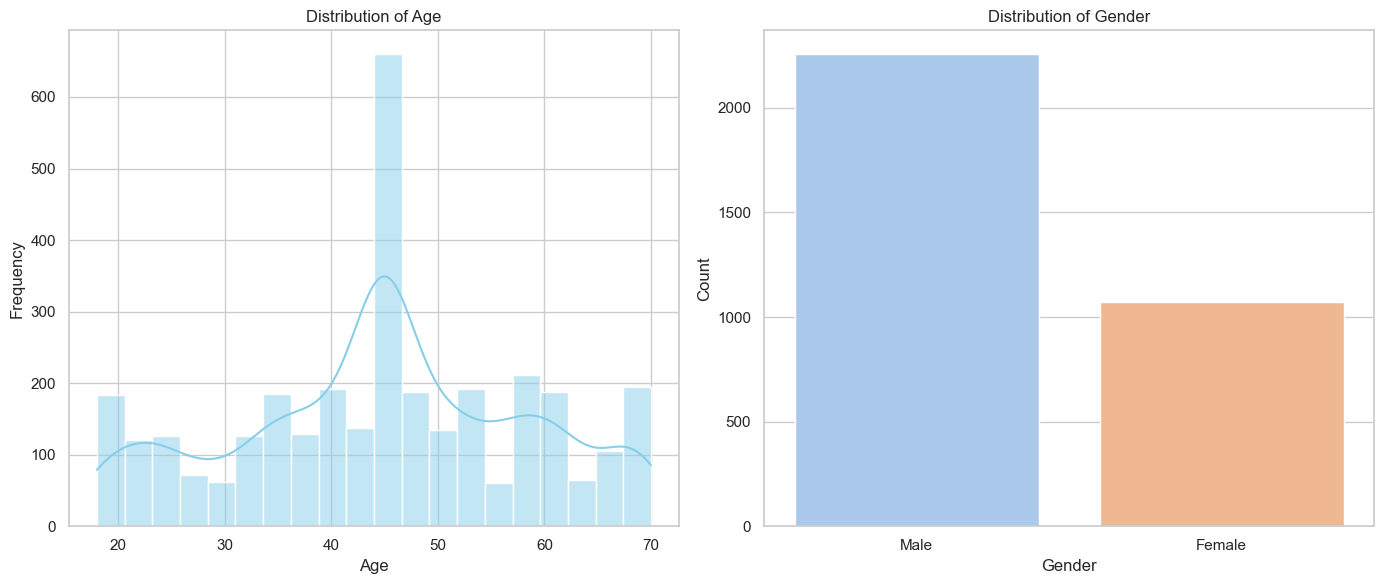

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Distribution of Age
sns.histplot(cleaned_data['Age'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution of Gender
sns.countplot(x='Gender', data=cleaned_data, palette='pastel', ax=axes[1])
axes[1].set_title('Distribution of Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()



Create a bar plot to visualize the distribution of online shoppers and offline shoppers.


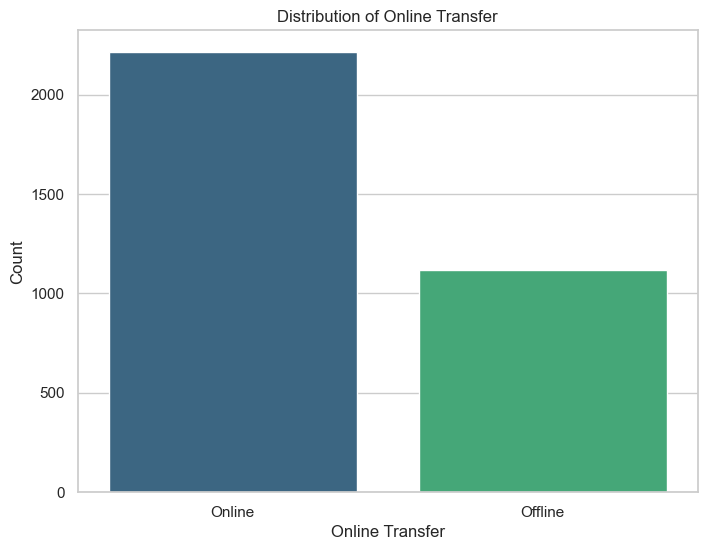

In [18]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of online Transfer modes
plt.figure(figsize=(8, 6))
sns.countplot(x='Online Transfer', data=cleaned_data, palette='viridis')
plt.title('Distribution of Online Transfer')
plt.xlabel('Online Transfer')
plt.ylabel('Count')
plt.show()


Create a bar plot to visualize the distribution of payment method

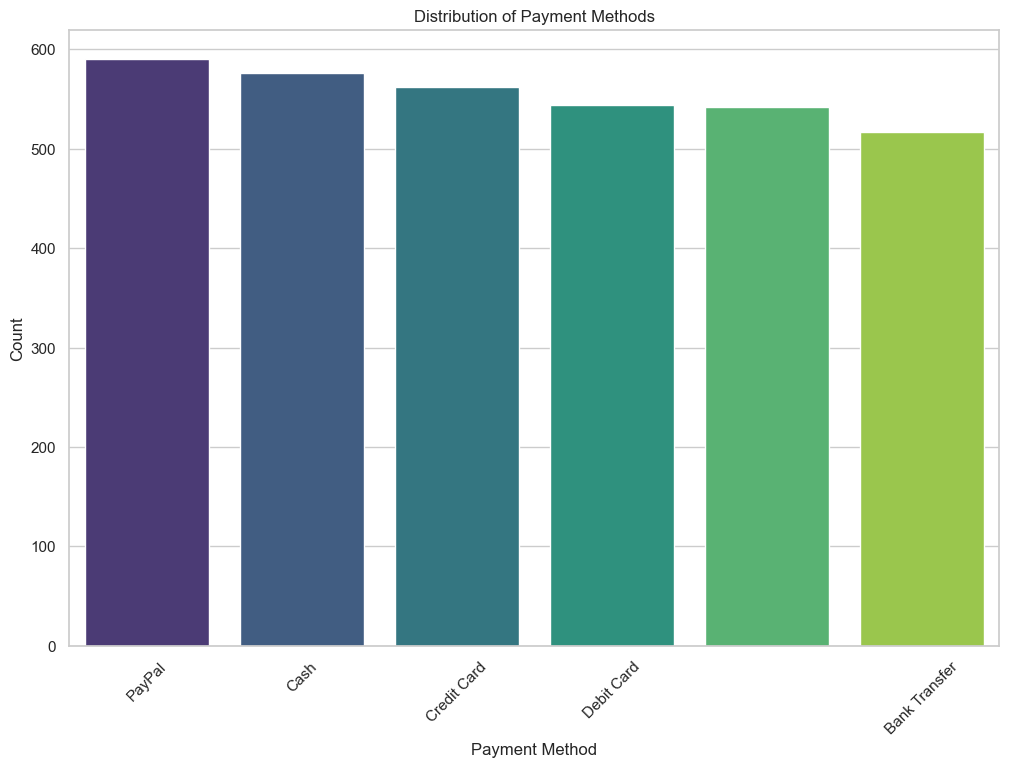

In [19]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of payment methods
plt.figure(figsize=(12, 8))
sns.countplot(x='Payment Method', data=cleaned_data, palette='viridis', order=data['Payment Method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


 Create a bar plot to visualize the distribution of frequency of purchases.


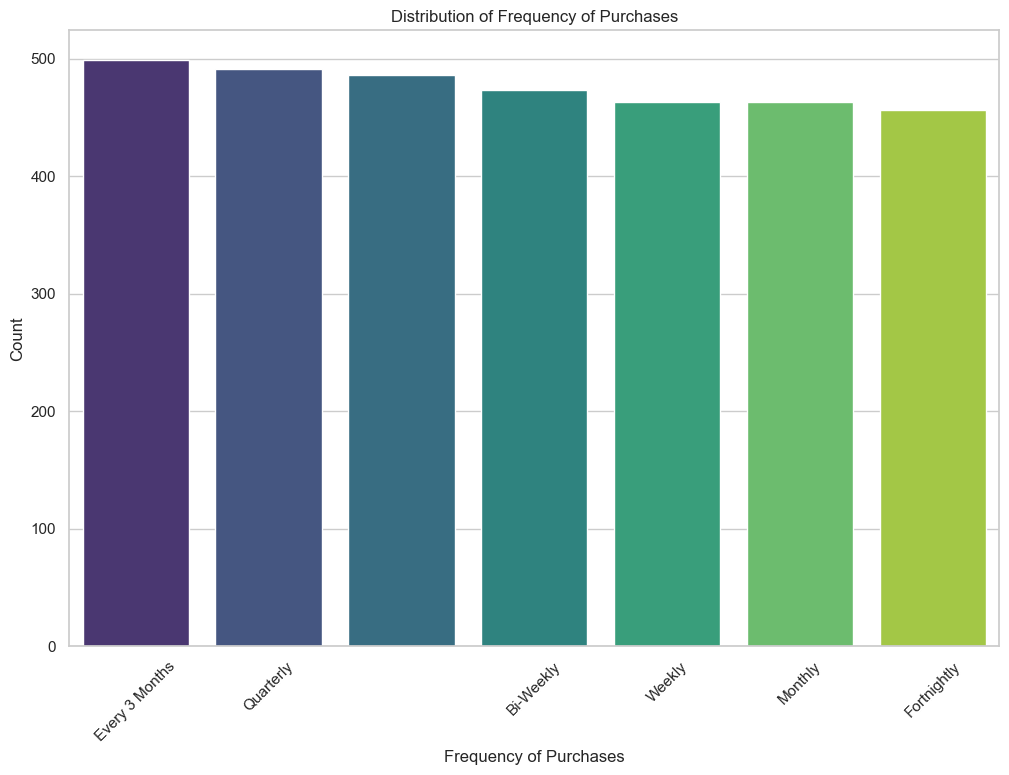

In [20]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of frequency of purchases
plt.figure(figsize=(12, 8))
sns.countplot(x='Frequency of Purchases', data=cleaned_data, palette='viridis', order=data['Frequency of Purchases'].value_counts().index)
plt.title('Distribution of Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Create a bar plot to visualize the distribution of the city of purchases


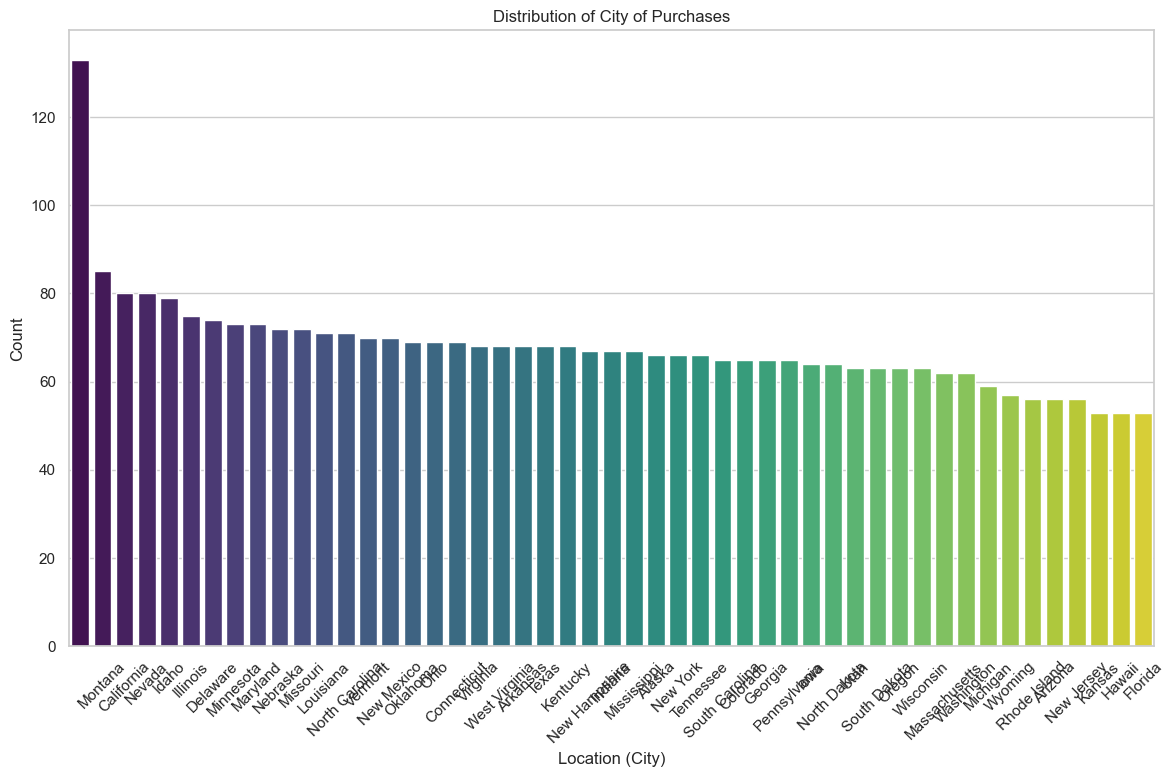

In [21]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of the city of purchases
plt.figure(figsize=(14, 8))
sns.countplot(x='Location', data=cleaned_data, palette='viridis', order=data['Location'].value_counts().index)
plt.title('Distribution of City of Purchases')
plt.xlabel('Location (City)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Create a bar plot to visualize the distribution of the subscription status


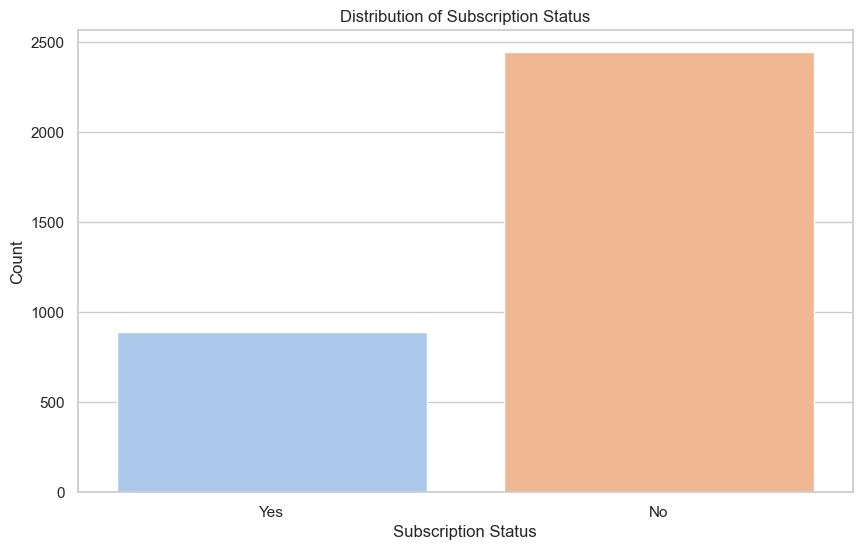

In [22]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of subscription status
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Status', data=cleaned_data, palette='pastel')
plt.title('Distribution of Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()


Create a histogram to visualize the distribution of the age

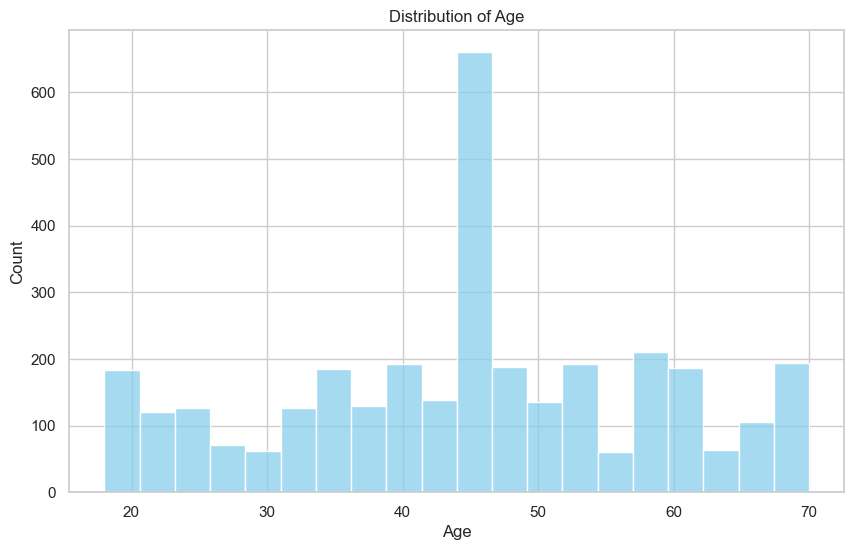

In [23]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a histogram for the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Age'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Conclusion and Insight

Here are the key findings from the data wrangling process:

- Missing Values Handling:

There were missing values in columns such as "Age," "Purchase Amount," "Size," and others.
Missing numerical values in the "Age" column were filled with the mean age.
Missing categorical values in columns like "Size" and "Color" were filled with the most frequent value.


- New Columns Creation:

Created a new column "Age Group" categorizing consumers into groups such as "Young," "Middle-aged," and "Senior" based on the "Age" column.
Created a binary column "Online Shopper" based on the "Preferred Shopping Channel," considering "Online" as a reference for online shoppers.
Label Encoding and One-Hot Encoding:

- Encoded categorical columns using label encoding and one-hot encoding.

Label encoding was applied to ordinal categorical columns, and one-hot encoding was used for nominal categorical columns.
Exploratory Data Analysis (EDA):

- Explored the distribution of various features using bar plots and histograms.

Visualized the distribution of age, gender, online shoppers, payment method, frequency of purchases, city of purchases, and subscription status.


- Data Visualization:

Used seaborn for data visualization, creating aesthetically pleasing plots to better understand the distribution of age and other categorical features.

# Insights:

The majority of consumers fall into the middle-aged category.
Payment methods, frequency of purchases, and other categorical features were analyzed to understand consumer behavior.
Most consumers prefered to use paypal, frequency of purchase was every 3 months and majority of customers have not subscribed.



# How businesses could use this information to tailor their strategies to meet customer needs and enhance the shopping experience.

- Middle-Aged Consumer Focus:

Target marketing efforts towards the middle-aged demographic since they constitute the majority of consumers. This might involve creating campaigns, promotions, or products that align with the preferences and purchasing patterns of this age group.

- Payment Method Optimization:

Given that the majority of customers prefer PayPal, businesses can ensure a seamless and secure PayPal integration in their online platforms. Additionally, consider offering promotions or discounts for customers using PayPal to further incentivize its use.

- Subscription Services:

Since most customers have not subscribed, businesses can explore strategies to promote subscription services. This could involve providing exclusive benefits, discounts, or early access to new products for subscribers. Clear communication of the value proposition of subscription services is crucial.

- Frequency of Purchases:

Understanding that the majority of customers make purchases every 3 months, businesses can create targeted marketing campaigns around these intervals. For example, promotions or reminders could be sent to customers approaching the 3-month mark to encourage repeat purchases.

- Data Security and Convenience:

Since PayPal is a popular payment method, businesses should prioritize data security and ensure a convenient checkout process. Offering a variety of secure payment options can cater to a diverse customer base.

By incorporating these strategies, businesses can create a more customer-centric approach, enhance customer satisfaction, and potentially increase customer loyalty and retention. Regularly reassessing these strategies based on evolving consumer behavior will be crucial for sustained success.